# MANIERODESYLABIZATOR

### Importy

In [2]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import load_model

### Funkcje Pomocnicze

In [3]:
slownik = ['a','ą','b','c','ć','d','e','ę','f','g','h','i','j','k','l','ł','m','n','ń','o','ó','p','q','r','s','ś','t','u','x','v','w','y','z','ź','ż']
char_to_int = dict((c, i) for i, c in enumerate(slownik))
max_length = 32

In [4]:
def resizer(X, length):
    if len(X) < length:
        X = X + [0]*(length-len(X))
    else:
        X = X[:length]
    return X

def word_to_indices(word, length):
    indices = [slownik.index(c)+1 for c in word]
    indices = resizer(indices, length)
    return indices

def locate_syllables(locations, length):
    s = [0]*length
    for i in locations:
        s[i] = 1
    return s

# add 

### Dane treningowe

In [4]:

# data_file = open("training_set.txt", "r", encoding="utf-8")
data_file = open("training_set_human.txt", "r", encoding="utf-8")
data = data_file.read().split("\n")
# remove empty lines
data = [d for d in data if ' ' in d]

words = [word_to_indices(line.split()[0], max_length) for line in data]
X_train = np.zeros((len(words), max_length, len(slownik)))
for i, word in enumerate(words):
    for j, char in enumerate(word):
        if char != 0:
            X_train[i, j, char-1] = 1
# adjust X_train to be 2D for simple dense
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

y_train = [list(map(int, d.split()[1:])) for d in data]
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1017, 1120)
(1017, 32)


### Model

In [5]:
# model = Sequential()
# model.add(LSTM(256, input_shape=(None, len(slownik))))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='softmax'))  # modify output layer
# model.compile(loss='categorical_crossentropy', optimizer='adam')
def create_model(max_length, learning_rate):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential([
        # tf.keras.layers.SimpleRNN(len(slownik), input_shape=(max_length, len(slownik))),
        tf.keras.layers.Dense(256, activation='sigmoid', input_shape=(max_length*len(slownik),)),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        # tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(max_length, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

### Trening

Epoch 1/50
32/32 [==============================] - 1s 6ms/step - loss: 1.1772e-04 - accuracy: 0.9558
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 0.9538
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 0.9459
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 8.5473e-04 - accuracy: 0.9479
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 8.6289e-04 - accuracy: 0.9449
Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: 1.7137e-04 - accuracy: 0.9420
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: 1.8473e-04 - accuracy: 0.9469
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 1.8432e-04 - accuracy: 0.9440
Epoch 9/50
32/32 [==============================] - 0s 5ms/step - loss: 5.3549e-05 - accuracy: 0.9518
Epoch 10/50
32/32 [==============================] - 0s 6ms/step - loss: 3.5303e-05 - accu

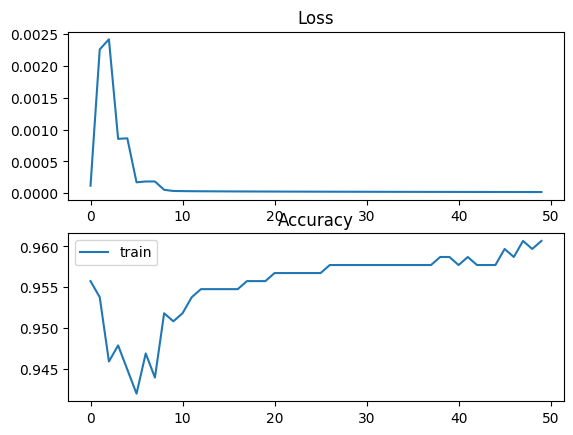

In [7]:
# train the model
model = load_model('model3.h5')
# run model on cuda
# with tf.device('/gpu:0'):
# model = create_model(max_length, learning_rate=0.0005)
    
# model = create_model(max_length, learning_rate=0.001)
history = model.fit(X_train, y_train, epochs=50)
# # save the model to file
model.save('model3.h5')

# evaluate the model
# loss, acc = model.evaluate(X_train, y_train)
# print('Accuracy: %f' % (acc*100))

#  plot loss and accuracy
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')

plt.legend()
plt.show()

### Ładowanie modelu

In [5]:
from keras.models import load_model
model = load_model('model3.h5')

### Testy

In [6]:
def test_model(model, input_wrod, max_len):
    X_new = np.zeros((1, max_len, len(slownik)))
    for j, char in enumerate(input_wrod):
        if j == max_len:
            break
        X_new[0, j, char_to_int[char]] = 1
    # adjust X_train to be 2D for simple dense
    X_new = X_new.reshape((X_new.shape[0], X_new.shape[1]*X_new.shape[2]))
    
    y_pred = model.predict(X_new)[0]
    # print(y_pred)
    y_pred = [int(round(x)) for x in y_pred]
    
    output = []
    for i in range(len(input_wrod)):
        if y_pred[i] == 1:
            output.append('-')
        output.append(input_wrod[i])
        # output.append('_')
    return "".join(output)

In [7]:
while True:
    word = input("Podaj słowo: ")
    if word == "q":
        break
    print(test_model(model, word, max_length))
    # print(word)

1/1 [==============================] - 0s 81ms/step
-me-cha-ni-ka
1/1 [==============================] - 0s 23ms/step
-kwan-ty
1/1 [==============================] - 0s 19ms/step
-re-su-scy-ta-cja
1/1 [==============================] - 0s 17ms/step
-kom-bajn
1/1 [==============================] - 0s 18ms/step
-re-ko-ne-san-s
1/1 [==============================] - 0s 19ms/step
-miria-dy
1/1 [==============================] - 0s 17ms/step
-e-nter


In [ ]:
# test model
# f = open("slowa.txt", "r", encoding="utf-8")
# words = f.read().split("\n")
# words = [w for w in words if len(w) > 0]
# N = 100
# for i in range(N):
#     word = words[random.randint(0, len(words)-1)]
#     print(f'{i}.', word, test_model(model, word, max_length))

In [ ]:
# rowerzystaoczarowaniepoduszkowiec